# Neural Networks

https://www.youtube.com/watch?v=aircAruvnKk


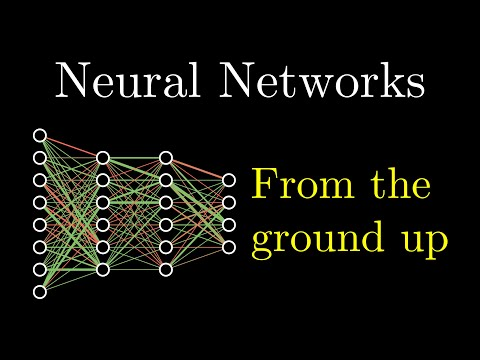

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo('aircAruvnKk', width=800, height=300)

## Dependencies

In [6]:
import numpy as np
import tensorflow.keras as keras
import tensorflow as tf
import matplotlib.pyplot as plt


## Dataset

In [4]:
mnist = tf.keras.datasets.mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X.shape

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)

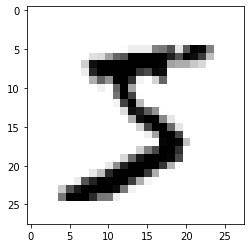

In [7]:
plt.imshow(
    train_X[0],
    cmap = plt.cm.binary #colormap
)

plt.show()

In [8]:
train_y[0]

5

## Normalization

In [9]:
train_X.shape

(60000, 28, 28)

In [10]:
set(
    train_X[0].reshape(-1, 1).ravel()
) #Each value ranes from 0 to 255

{0,
 1,
 2,
 3,
 9,
 11,
 14,
 16,
 18,
 23,
 24,
 25,
 26,
 27,
 30,
 35,
 36,
 39,
 43,
 45,
 46,
 49,
 55,
 56,
 64,
 66,
 70,
 78,
 80,
 81,
 82,
 90,
 93,
 94,
 107,
 108,
 114,
 119,
 126,
 127,
 130,
 132,
 133,
 135,
 136,
 139,
 148,
 150,
 154,
 156,
 160,
 166,
 170,
 171,
 172,
 175,
 182,
 183,
 186,
 187,
 190,
 195,
 198,
 201,
 205,
 207,
 212,
 213,
 219,
 221,
 225,
 226,
 229,
 238,
 240,
 241,
 242,
 244,
 247,
 249,
 250,
 251,
 252,
 253,
 255}

In [11]:
train_X = tf.keras.utils.normalize(train_X, axis = 1)
test_X = tf.keras.utils.normalize(test_X, axis = 1)

In [12]:
set(
    train_X[0].reshape(-1, 1).ravel()
) #Each value ranes from 0 to 255

{0.0,
 0.001291638275603334,
 0.0017157656927661758,
 0.002583276551206668,
 0.0029117418490504305,
 0.0039312436435731965,
 0.006250335720407404,
 0.013126034057736942,
 0.014256948070666159,
 0.01601458016977737,
 0.016223782922246823,
 0.023329551388362804,
 0.023335171658199007,
 0.023598229705086286,
 0.025373104769234954,
 0.026205676641453873,
 0.026252068115473884,
 0.0408993336947506,
 0.04117837662638822,
 0.04431706172896948,
 0.045002250168764066,
 0.04586450917502063,
 0.05110616736645155,
 0.05298496674891638,
 0.05664824129382238,
 0.0578048631247428,
 0.05882701980512324,
 0.05945041980090344,
 0.06524512654946131,
 0.06551419160363468,
 0.0669700625281599,
 0.10191096471676507,
 0.10498298124763263,
 0.11198800009007391,
 0.11646967396201723,
 0.11664775694181402,
 0.11961606534067908,
 0.12250612545941328,
 0.12298800925361815,
 0.12760592112762187,
 0.128578814918233,
 0.1493173334534319,
 0.15214552134447223,
 0.15370495479679672,
 0.15414630166598078,
 0.1573101977

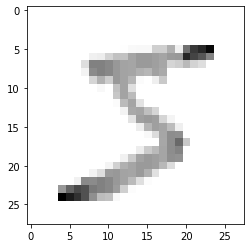

In [13]:
plt.imshow(train_X[0], cmap=plt.cm.binary)
plt.show()

## Model

Create instance of Sequential model:

In [14]:
model = tf.keras.models.Sequential()

add input layer:

In [15]:
model.add(tf.keras.layers.Flatten()) #Flattens input array

add `.Dense` hidden layer:

    - In a densely-connected layer, each node connects to each prior and subsequent node

In [17]:
model.add(tf.keras.layers.Dense(
    128, # number of nodes
    activation = tf.nn.sigmoid #Sigmoid function
))

Add a second hidden layer:

In [18]:
model.add(tf.keras.layers.Dense(
    128, # number of nodes
    activation = tf.nn.sigmoid #Sigmoid function
))

Add final output layer:

In [19]:
model.add(tf.keras.layers.Dense(
    10,
    activation = tf.nn.softmax  # Normalizes final output
))

The `.softmax` function maps the non-normalized output of a network to a probability distribution

- Values in distribution range from 0 to 1
- All probabilities add up to 1

In [20]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [22]:
model.fit(train_X, train_y, epochs = 3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 4s 70us/sample - loss: 0.5291 - accuracy: 0.8555
Epoch 2/3
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2212 - accuracy: 0.9338
Epoch 3/3
60000/60000 [==============================] - 4s 65us/sample - loss: 0.1616 - accuracy: 0.9513


Validation:

In [23]:
val_loss, val_acc = model.evaluate(test_X, test_y)
print(f"Loss: {val_loss}")
print(f"Accuracy: {val_acc}")

10000/10000 [==============================] - 0s 46us/sample - loss: 0.1531 - accuracy: 0.9528
Loss: 0.15310236665308474
Accuracy: 0.9527999758720398


Save the model:

In [24]:
model.save('msint.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: msint.model/assets


Load a saved model:

In [25]:
new_model = tf.keras.models.load_model('msint.model/')

Predictions:

In [27]:
predictions = new_model.predict(test_X)
predictions[0]

array([1.9750907e-05, 4.7268418e-06, 1.2613847e-03, 1.0866855e-03,
       1.6993293e-06, 2.3581528e-05, 4.8849707e-09, 9.9750024e-01,
       8.0312566e-06, 9.3838193e-05], dtype=float32)

Convert probability distributions to single prediciton:

In [28]:
max(predictions[0]) #Most probable

0.99750024

In [29]:
print(np.argmax(predictions[0])) #Returns index of the maximum value

7


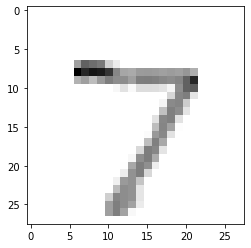

In [30]:
plt.imshow(test_X[0], cmap= plt.cm.binary)
plt.show()